## Task-1: Prediction using Suprevised ML

In this tak, we need to predict the percentage of a student based on the numbers of study hours. This task contain two variables. This task is sloved by using simple regression.

In [19]:
# Importng all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Author: Vedant Rao

Extracting data from the link

In [20]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Imported Successfully")
data.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
data.shape

(25, 2)

In [22]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [24]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [26]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


There are 25 rows and 2 columns having information about the hours ans the scores.
The are ono null columns in the dataset.

Plotting hours vs Score Graph

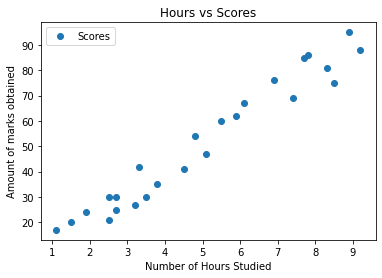

In [27]:
data.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Scores")
plt.xlabel("Number of Hours Studied")
plt.ylabel("Amount of marks obtained")
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the amount of marks obtained and the number of hours studies

# Prepration of Data

In [10]:
x = data.iloc[:, : -1].values
y = data.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Now train the Algorithm

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Traning Completed")
print(regressor.intercept_)
print(regressor.coef_)

Traning Completed
2.018160041434662
[9.91065648]


Noe plotting the Regression Line

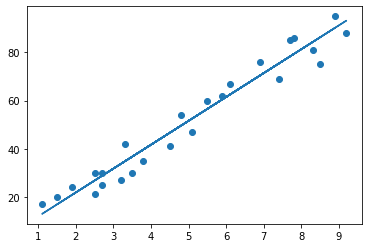

In [13]:
Line = regressor.coef_ * x + regressor.intercept_

# Plotting the Test Data
plt.scatter(x, y)
plt.plot(x, Line)
plt.show()

In [14]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
print(regressor.score(x_test, y_test))

0.9454906892105354


In [16]:
data1 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
data1

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Given Task

What will be the predicted score if the tudent studied for 9.25 hours / day ?

In [17]:
hours = np.array([[9.25]])
final_pred = regressor.predict(hours)
print('Numbers of hours studied: {}'.format(hours))
print('Marks predicted: {}'.format(final_pred[0]))

Numbers of hours studied: [[9.25]]
Marks predicted: 93.69173248737539
